***1.What are the packages imported to answer the other questions? ***

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/kurianbenoy/DataminingLab/master/anomaly.csv")
df.head()

,Price,Quantity,Weekend
0,69.87,25,0
1,97.49,44,1
2,206.00,99,1
3,127.71,227,0
4,186.00,6,0


2.	Determine the value of K needs to be chosen for K-Means algorithm (use the Elbow Method)

In [100]:
sse = {}
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

In [101]:
sse

{1: 386695.6504833333,
 2: 170561.0353756839,
 3: 106409.38386501832,
 4: 73346.78907833333,
 5: 51449.362865,
 6: 38926.21188689655,
 7: 28774.613216296293,
 8: 23208.979346296295,
 9: 18739.86688162879,
 10: 14819.033548295458,
 11: 12028.199714962124,
 12: 10008.503664962122,
 13: 8231.408267857143,
 14: 6566.384458333334,
 15: 5275.700591666667}

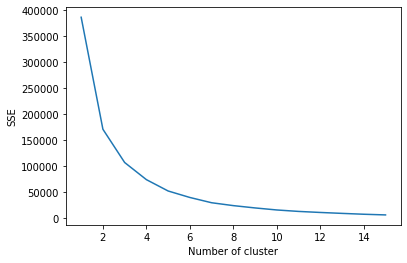

In [102]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Let's choose the value of `K=4`, from the elbow curve

**3.	Reduce the data to 2 features using PCA. Prior to apply PCA Standardized the data**

In [103]:
scaled_df = StandardScaler().fit_transform(df)

In [105]:
n_features = 2
pca = PCA(n_features)

In [106]:
print(f"Reducted form: \n {pca.fit_transform(scaled_df)}")

pca_results = pca.fit_transform(scaled_df)

Reducted form: 
 [[-1.21723481  0.46629302]
 [ 1.13426166 -0.43403565]
 [ 2.7594579   0.77981911]
 [ 1.09312488  1.34195837]
 [ 0.46279073  0.55210983]
 [-0.71022785 -1.16499891]
 [-0.64704076  1.00999275]
 [ 2.29154908  3.02682525]
 [-1.02779214 -0.74316412]
 [-0.52363974  0.94352152]
 [-0.59734291  2.19632446]
 [-1.37243031  0.40406943]
 [-1.18216374  0.63235752]
 [ 2.34862161  1.70771851]
 [-1.12146569 -0.80243719]
 [-1.41660185  0.58829873]
 [ 1.81678725 -0.01027272]
 [ 2.24941383  0.2295381 ]
 [-0.6999905  -1.17055396]
 [-0.36582567  0.20417186]
 [-0.61962511 -1.07959226]
 [ 0.51262209 -0.96883749]
 [ 2.08100803  0.23528395]
 [ 1.74306235 -1.53609021]
 [ 0.28301351 -1.21945513]
 [-0.14889502 -0.54714279]
 [-1.36234429  0.5343899 ]
 [-1.11634501 -0.6828794 ]
 [-1.25280425  0.49941793]
 [-1.25894586  0.55168508]
 [-1.09126211 -0.61085456]
 [-0.60631695 -1.11128089]
 [ 1.05080387 -1.35134771]
 [-0.53427347  2.29948513]
 [ 2.06811678  0.01238671]
 [-0.08951679 -0.48149383]
 [ 1.284845

In [107]:
reduced_pca_df = pd.DataFrame(pca_results, columns=['feature1', 'feature2'])

In [108]:
reduced_pca_df.head()

,feature1,feature2
0,-1.217235,0.466293
1,1.134262,-0.434036
2,2.759458,0.779819
3,1.093125,1.341958
4,0.462791,0.552110


**4.	Apply K-means clustering to the reduced data.**

**5.	Display the number of objects in each cluster.**

In [109]:
km = KMeans(n_clusters=2, max_iter=1000)
km.fit(reduced_pca_df)

KMeans(max_iter=1000, n_clusters=2)

In [110]:
centroid = km.cluster_centers_

In [111]:
reduced_pca_df["clusters"] = km.labels_

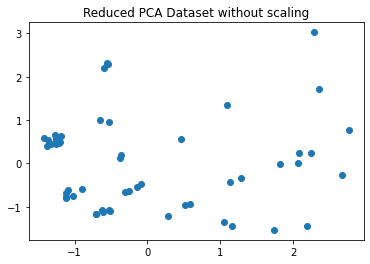

In [112]:
plt.scatter(reduced_pca_df['feature1'], reduced_pca_df['feature2'])
plt.title("Reduced PCA Dataset without scaling")
plt.show()

In [113]:
reduced_pca_df.head()

,feature1,feature2,clusters
0,-1.217235,0.466293,0
1,1.134262,-0.434036,1
2,2.759458,0.779819,1
3,1.093125,1.341958,1
4,0.462791,0.552110,1


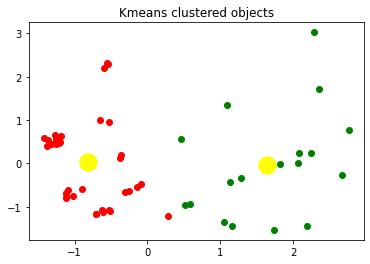

In [114]:
plt.scatter(centroid[:,0],centroid[:,1],s=300,c='yellow',label='Centroids')
plt.scatter(reduced_pca_df[reduced_pca_df['clusters']==0]['feature1'], reduced_pca_df[reduced_pca_df['clusters']==0]['feature2'],c='red', label='cluster1')
plt.scatter(reduced_pca_df[reduced_pca_df['clusters']==1]['feature1'], reduced_pca_df[reduced_pca_df['clusters']==1]['feature2'],c='green', label='cluster2')
plt.title("Kmeans clustered objects")
plt.show()

**6.	Make a dataframe (reduced_df) with attributes principal_feature1, principal_feature2, and cluster_no (principal features will be obtained from PCA and cluster No obtained from K-means)**

In [115]:
reduced_pca_df['principal_feature1'] = reduced_pca_df['feature1']
reduced_pca_df['principal_feature2'] = reduced_pca_df['feature2']
reduced_pca_df['cluster_no'] = reduced_pca_df['clusters']
reduced_df = reduced_pca_df[['principal_feature1', 'principal_feature2', 'cluster_no']]

**7.	Show 5 rows of the  dataframe reduced_df**


In [116]:
reduced_df.head()

,principal_feature1,principal_feature2,cluster_no
0,-1.217235,0.466293,0
1,1.134262,-0.434036,1
2,2.759458,0.779819,1
3,1.093125,1.341958,1
4,0.462791,0.552110,1


**8.	Write a function that will return Series of distance between each point of the standardized reduced data and its distance with the closest centroid**

In [157]:
def distance_bw_points(df):
  # we choose the closest centroid as centroid assignment by kmeans centre
  dist1 = abs(df.loc[:,"principal_feature1"] - centroid[df.loc[:, "cluster_no"]][:,0])
  dist2 = abs(reduced_df.loc[:,"principal_feature2"] - centroid[reduced_df.loc[:, "cluster_no"]][:,1])
  return dist1 + dist2

In [158]:
distance_bw_points(reduced_df)

0     0.840931
1     0.893242
2     1.945809
3     1.934027
4     1.774513
5     1.297368
6     1.159686
7     3.724906
8     0.974222
9     1.216616
10    2.395716
11    0.933903
12    0.971925
13    2.462872
14    1.127169
15    1.162304
16    0.213046
17    0.885484
18    1.313160
19    0.635080
20    1.302564
21    2.049684
22    0.722824
23    1.593959
24    2.345065
25    1.240844
26    1.054137
27    1.002490
28    0.909625
29    0.968034
30    0.905382
31    1.347561
32    1.894012
33    2.561946
34    0.487035
35    1.234574
36    0.636705
37    1.226562
38    1.440370
39    0.925853
40    1.386287
41    1.082853
42    1.196922
43    0.844075
44    0.860303
45    2.556107
46    0.878041
47    0.542655
48    0.696423
49    1.879442
50    1.940367
51    1.099424
52    1.247510
53    1.943133
dtype: float64

**9.	Using the above defined function get the distance between each point of the standardized reduced data and its nearest centroid.**

In [159]:
reduced_df['distance'] = distance_bw_points(reduced_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
reduced_df.head()

,principal_feature1,principal_feature2,cluster_no,distance
0,-1.217235,0.466293,0,0.840931
1,1.134262,-0.434036,1,0.893242
2,2.759458,0.779819,1,1.945809
3,1.093125,1.341958,1,1.934027
4,0.462791,0.552110,1,1.774513


**10.The largest distances are considered as Outlier. To get the number of outliers we will consider a fraction of the distance series. Display the number of outliers (k) using the outliers fraction value 0.1. **

In [169]:
no_outliers = reduced_df.shape[0]
outlier_fraction = 0.1
print(f"No of outliers: {no_outliers*0.1}")

No of outliers: 5.4


**11.	Set the threshold value to detect a point as outlier or not  as the minimum of the largest k distance**

Let's choose no_outlier(k) as 6

In [171]:
k = 6

In [174]:
largest_k_dist = sorted(reduced_df['distance'].tolist(), reverse=True)[:k]

In [175]:
largest_k_dist

[3.7249059208256594,
 2.561945868606106,
 2.5561066882690553,
 2.4628717137416727,
 2.395715758578964,
 2.3450653810836135]

In [180]:
threshold = min(largest_k_dist)

In [182]:
print(f"threshold = {threshold}")

threshold =2.3450653810836135


**12.	Add another column in the dataframe reduced_df  to show the particular object is Outlier or not (1 or 0)**

In [199]:
for x,row in reduced_df.iterrows():
  if (row["distance"]>threshold):
    row["outlier"] = 1
  else:
    row["outlier"] = 0
  reduced_df.at[x,'outlier'] = row["outlier"]

In [200]:
reduced_df.head()

,principal_feature1,principal_feature2,cluster_no,distance,outlier
0,-1.217235,0.466293,0,0.840931,0.0
1,1.134262,-0.434036,1,0.893242,0.0
2,2.759458,0.779819,1,1.945809,0.0
3,1.093125,1.341958,1,1.934027,0.0
4,0.462791,0.552110,1,1.774513,0.0


In [201]:
reduced_df['outlier'].value_counts()

0.0    49
1.0     5
Name: outlier, dtype: int64

**13.	Plot a scatter plot in which x-axis is principal_feature1, y-axis is principal_feature2 and the points will be in two different colours to indicate their class labels (Outlier or not)**

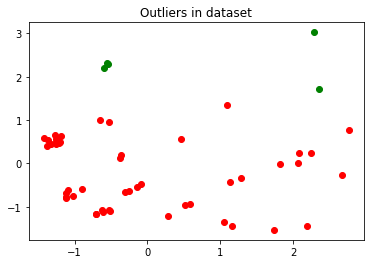

In [204]:
plt.scatter(reduced_df[reduced_df['outlier']==0]['principal_feature1'], reduced_df[reduced_df['outlier']==0]['principal_feature2'],c='red', label='Not outlier')
plt.scatter(reduced_df[reduced_df['outlier']==1]['principal_feature1'], reduced_df[reduced_df['outlier']==1]['principal_feature2'],c='green', label='Outlier')
plt.title("Outliers in dataset")
plt.show()